***This notebook use additional modules for results analysis and visualization, please install them if they are not exist in your environment***

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

### Results of models training on noise data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
paths = ['iterations/iterations - batchnorm L1 loss',
        'iterations/iterations - batchnorm SSIM loss',
        'iterations/iterations - batchnorm BCE loss',
        'iterations/iterations - none L1 loss',
        'iterations/iterations - none SSIM loss',
        'iterations/iterations - none BCE loss',
        'iterations/iterations - batchnorm SSIM + BCE loss']

In [5]:
results = [pd.read_csv(f'{path}/results.csv', sep='\t') for path in paths]
results = pd.concat(results).reset_index(drop=True)
results

,norm type,loss type,noise type,loss value,L1 val,SSIM val,start time,end time,duration (sec)
0,batchnorm,L1 loss,0%,0.000692,0.001822,0.986341,2024-02-28 23:29:22.741161,2024-02-29 01:06:16.787702,5814.046541
1,batchnorm,L1 loss,1%,0.000847,0.002272,0.980649,2024-02-29 01:06:50.851732,2024-02-29 02:44:46.981594,5876.129862
2,batchnorm,L1 loss,3%,0.034894,0.033058,0.837907,2024-02-29 02:45:21.807343,2024-02-29 04:23:27.481336,5885.673993
3,batchnorm,L1 loss,5%,0.000884,0.002287,0.981316,2024-02-29 04:24:02.208523,2024-02-29 06:02:14.555386,5892.346863
4,batchnorm,L1 loss,10%,0.000995,0.002158,0.983206,2024-02-29 06:02:49.408318,2024-02-29 07:40:48.146197,5878.737879
5,batchnorm,L1 loss,25%,0.034894,0.033058,0.837907,2024-02-29 07:41:23.222486,2024-02-29 09:19:24.931029,5881.708543
6,batchnorm,L1 loss,50%,0.000658,0.002422,0.980730,2024-02-29 09:19:59.786525,2024-02-29 10:58:06.358221,5886.571696
7,batchnorm,SSIM loss,0%,0.000074,0.001576,0.988050,2024-02-29 11:05:24.038480,2024-02-29 12:48:05.178528,6161.140048
8,batchnorm,SSIM loss,1%,0.000041,0.001177,0.993077,2024-02-29 12:48:39.172592,2024-02-29 14:32:32.963633,6233.791041
9,batchnorm,SSIM loss,3%,0.000065,0.000835,0.996840,2024-02-29 14:33:07.644379,2024-02-29 16:18:46.687580,6339.043201


### Metrics of models which did not converged on plateau

- loss value - last value of loss after training
- L1 val - L1 value on validation set
- SSIM val - SSIM value on validation set

In [6]:
def plot_bar_results(results: pd.DataFrame, 
                     figsize: tuple,
                     noize: str = '0%'):
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    bar_data = results[(results['noise type'] == noize) & (results['loss value'] < 0.034)]
    name_column = bar_data['norm type'] + ' ' + bar_data['loss type']
    
    width = 0.2
    x = np.arange(bar_data.shape[0])
    axes[0].bar(x-0.2, bar_data['L1 val'], width, color='cyan')
    axes[0].bar(x, bar_data['loss value'], width, color='green')
    axes[0].set_xticks(x, name_column, rotation=-30)
    axes[0].legend(['L1 val', 'loss value'], loc=1)
    axes[0].set_title(f'Metrics of models without plateu (noise {noize}) ')
    axes[0].grid()
    
    axes[1].bar(name_column, bar_data['SSIM val'], width, color='cyan')
    axes[1].set_xticks(x, name_column, rotation=-30)
    axes[1].set_title(f'SSIM val of models without plateu (noise {noize})')
    axes[1].grid()
    
    plt.show()

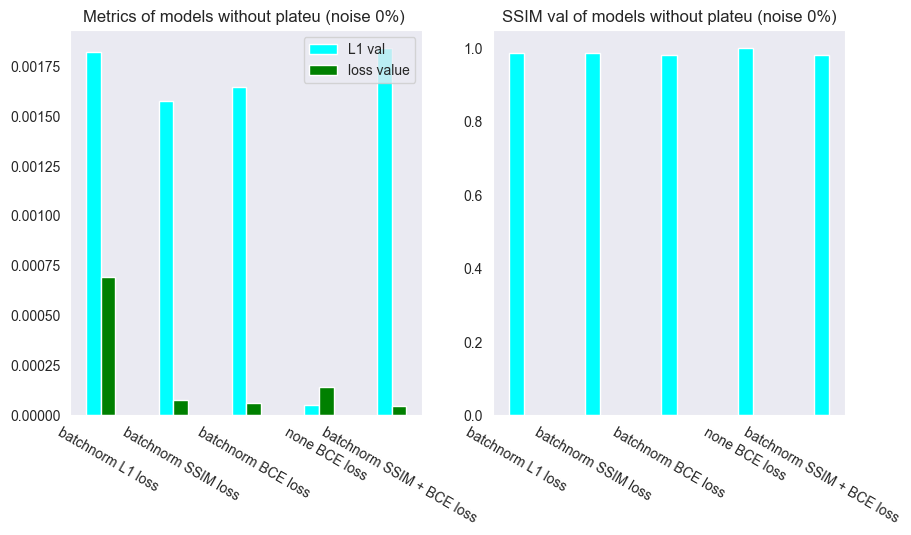

In [7]:
plot_bar_results(results, figsize=(10, 5), noize='0%')

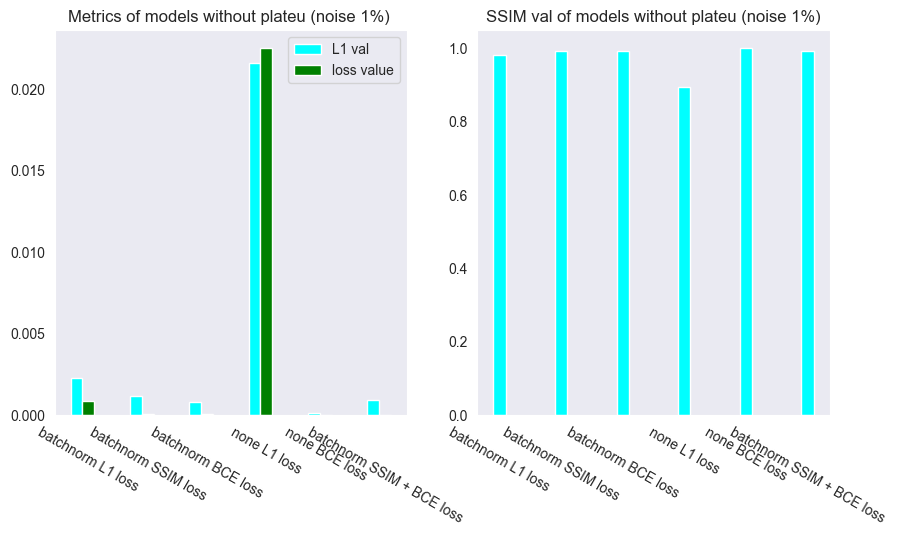

In [8]:
plot_bar_results(results, figsize=(10, 5), noize='1%')

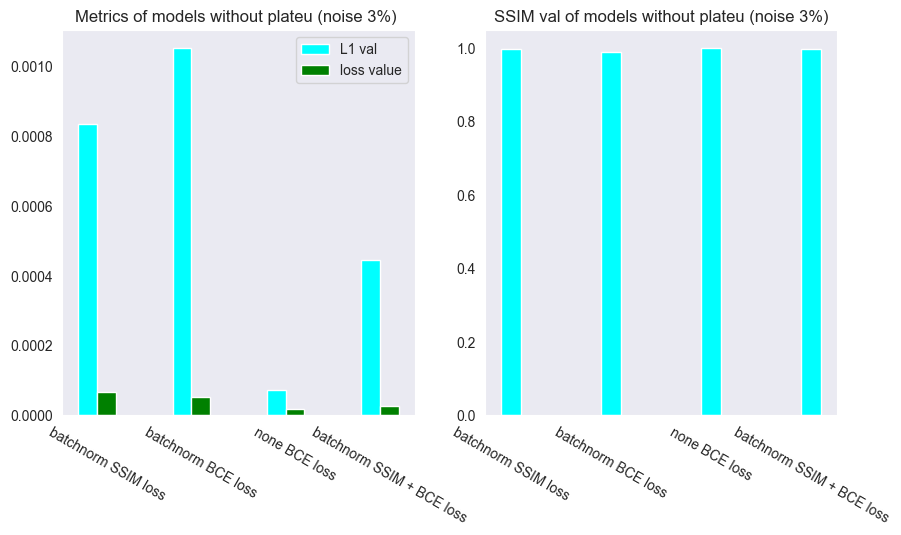

In [9]:
plot_bar_results(results, figsize=(10, 5), noize='3%')

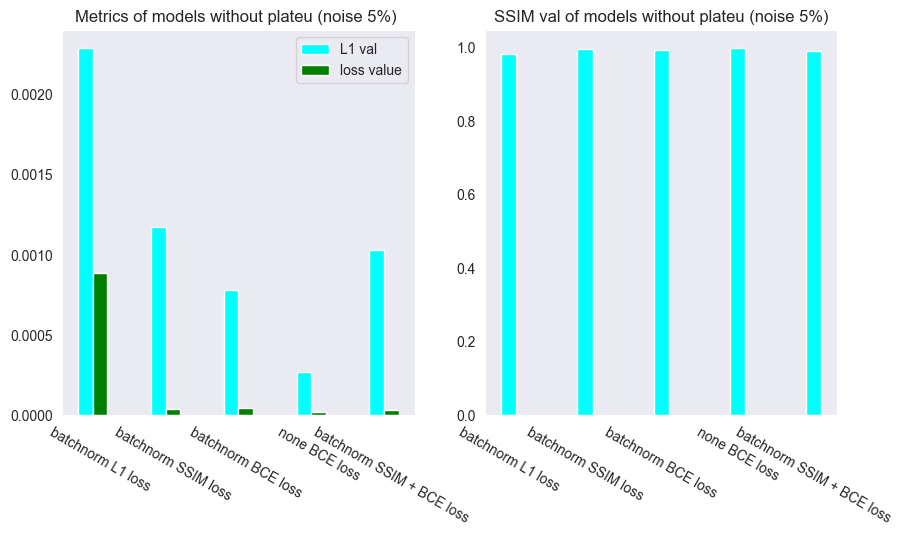

In [10]:
plot_bar_results(results, figsize=(10, 5), noize='5%')

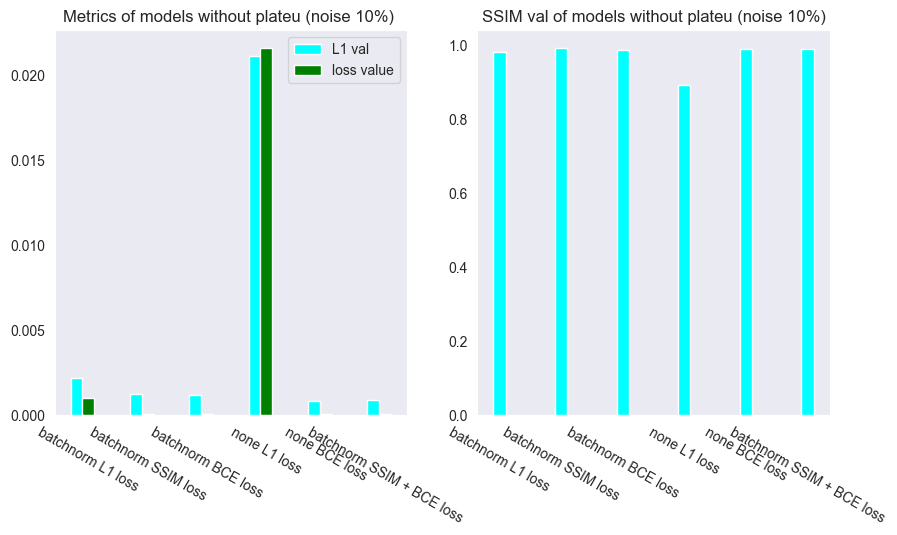

In [11]:
plot_bar_results(results, figsize=(10, 5), noize='10%')

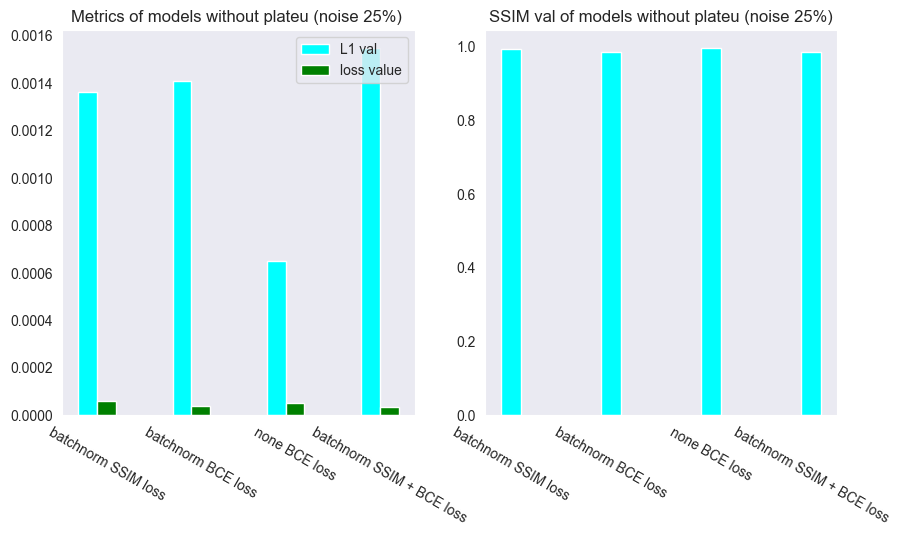

In [12]:
plot_bar_results(results, figsize=(10, 5), noize='25%')

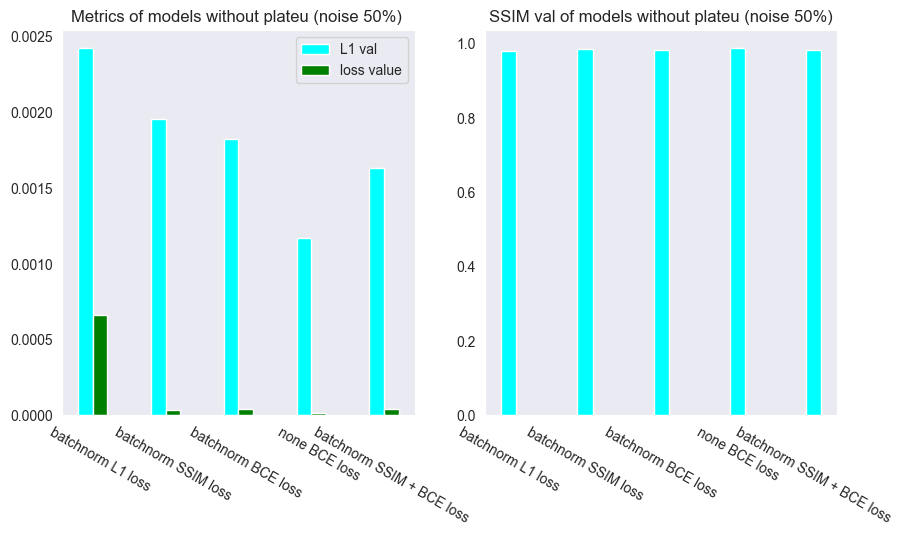

In [13]:
plot_bar_results(results, figsize=(10, 5), noize='50%')

### Best values for zero noise data

In [14]:
print('Best values for 0% noize:')

bar_data = results[(results['noise type'] == '0%') & (results['loss value'] < 0.034)]
name_column = bar_data['norm type'] + ' ' + bar_data['loss type']
print(f'- best SSIM val: {name_column.iloc[bar_data["SSIM val"].argmax()]}, score = {bar_data["SSIM val"].max()}', 
      f'- best L1 val: {name_column.iloc[bar_data["L1 val"].argmin()]}, score = {bar_data["L1 val"].min()}',
      f'- best loss value: {name_column.iloc[bar_data["loss value"].argmin()]}, score = {bar_data["loss value"].min()}',
      sep='\n')

Best values for 0% noize:
- best SSIM val: none BCE loss, score = 0.9997283816337584
- best L1 val: none BCE loss, score = 5.082442294224165e-05
- best loss value: batchnorm SSIM + BCE loss, score = 4.703331943327754e-05


In [15]:
print('Models with no plateau and 0% noize')
bar_data

Models with no plateau and 0% noize


,norm type,loss type,noise type,loss value,L1 val,SSIM val,start time,end time,duration (sec)
0,batchnorm,L1 loss,0%,0.000692,0.001822,0.986341,2024-02-28 23:29:22.741161,2024-02-29 01:06:16.787702,5814.046541
7,batchnorm,SSIM loss,0%,0.000074,0.001576,0.988050,2024-02-29 11:05:24.038480,2024-02-29 12:48:05.178528,6161.140048
14,batchnorm,BCE loss,0%,0.000063,0.001647,0.982298,2024-02-29 23:48:03.550295,2024-03-01 01:25:51.375010,5867.824715
35,none,BCE loss,0%,0.000142,0.000051,0.999728,2024-03-02 11:21:11.978918,2024-03-02 12:06:03.418768,2691.439850
42,batchnorm,SSIM + BCE loss,0%,0.000047,0.001838,0.980933,2024-03-02 20:36:15.956414,2024-03-02 22:19:00.705427,6164.749013


### Correlation check between test metric and normalization block absence

In [16]:
results['norm'] = results['norm type'].apply(lambda x: x == 'batchnorm')
results['noise'] = results['noise type'].apply(lambda x: int(x[:-1])/100)

corr = results[['norm', 'noise', 'loss value', 'L1 val', 'SSIM val']].corr()

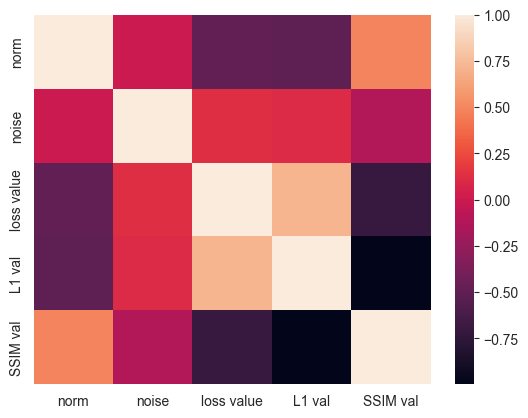

In [17]:
sns.heatmap(corr)
plt.show()

In [18]:
corr

,norm,noise,loss value,L1 val,SSIM val
norm,1.000000e+00,-3.387770e-17,-0.497079,-0.511535,0.490948
noise,-3.387770e-17,1.000000e+00,0.121358,0.103166,-0.122325
loss value,-4.970785e-01,1.213583e-01,1.000000,0.711778,-0.704455
L1 val,-5.115353e-01,1.031662e-01,0.711778,1.000000,-0.998607
SSIM val,4.909478e-01,-1.223252e-01,-0.704455,-0.998607,1.000000


Normalization block in model has linear effect for decreasing L1 on test (-0.51), and on SSIM increase on test (0.49)


### Best model


#### Train 

<img src="best model/x.gif">

#### Test

<img src="best model/y.gif">

#### Predict epoch 1200

<img src="best model/predict_epoch=1200.gif">

#### Predict epoch 1500

<img src="best model/predict_epoch=1500.gif">

#### Predict epoch 2250

<img src="best model/predict_epoch=2250.gif">

#### Final predict

<img src="best model/predict.gif">